# COVID19 Burden Index

It's the burden, stupid!: An index to track and manage the burden of COVID-19 on global healthcare systems

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import COVID19Py

## Sandbox

In [2]:
covid19 = COVID19Py.COVID19(data_source="jhu")

In [3]:
data = covid19.getAll(timelines=True)

In [4]:
location = covid19.getLocationByCountryCode("AU", timelines=True)

In [5]:
#location

In [6]:
df_ACT = pd.DataFrame.from_dict(location[0]['timelines']['confirmed']['timeline'], orient='index')
df_NSW = pd.DataFrame.from_dict(location[1]['timelines']['confirmed']['timeline'], orient='index')
df_NT = pd.DataFrame.from_dict(location[2]['timelines']['confirmed']['timeline'], orient='index')
df_QLD = pd.DataFrame.from_dict(location[3]['timelines']['confirmed']['timeline'], orient='index')
df_SA = pd.DataFrame.from_dict(location[4]['timelines']['confirmed']['timeline'], orient='index')
df_TAS = pd.DataFrame.from_dict(location[5]['timelines']['confirmed']['timeline'], orient='index')
df_VIC = pd.DataFrame.from_dict(location[6]['timelines']['confirmed']['timeline'], orient='index')
df_WA = pd.DataFrame.from_dict(location[7]['timelines']['confirmed']['timeline'], orient='index')

In [7]:
df_AU = df_ACT + df_NSW + df_NT + df_QLD + df_SA + df_TAS + df_VIC + df_WA
df_AU = df_AU.rename(columns={0: "cumulative_confirmed_cases"})
df_AU.index = pd.to_datetime(df_AU.index)
df_AU

,cumulative_confirmed_cases
2020-01-22 00:00:00+00:00,0
2020-01-23 00:00:00+00:00,0
2020-01-24 00:00:00+00:00,0
2020-01-25 00:00:00+00:00,0
2020-01-26 00:00:00+00:00,4
...,...
2020-03-27 00:00:00+00:00,3143
2020-03-28 00:00:00+00:00,3640
2020-03-29 00:00:00+00:00,3984
2020-03-30 00:00:00+00:00,4361


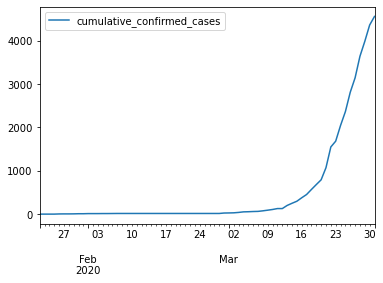

In [8]:
df_AU.plot()

In [9]:
Infected_Needing_ICU_ratio = [0.01, 0.02, 0.05, 0.1, 0.15]
Baseline_ICU_occupancy = 0.8

In [16]:
df_AU_CBI = df_AU
df_AU_CBI['CBI_1pct'] = (df_AU['cumulative_confirmed_cases'] * Infected_Needing_ICU_ratio[0]) / (((1 - Baseline_ICU_occupancy)) * 2200)
df_AU_CBI['CBI_2pct'] = (df_AU['cumulative_confirmed_cases'] * Infected_Needing_ICU_ratio[1]) / (((1 - Baseline_ICU_occupancy)) * 2200)
df_AU_CBI['CBI_5pct'] = (df_AU['cumulative_confirmed_cases'] * Infected_Needing_ICU_ratio[2]) / (((1 - Baseline_ICU_occupancy)) * 2200)
df_AU_CBI['CBI_10pct'] = (df_AU['cumulative_confirmed_cases'] * Infected_Needing_ICU_ratio[3]) / (((1 - Baseline_ICU_occupancy)) * 2200)
df_AU_CBI['CBI_15pct'] = (df_AU['cumulative_confirmed_cases'] * Infected_Needing_ICU_ratio[4]) / (((1 - Baseline_ICU_occupancy)) * 2200)
df_AU_CBI

,cumulative_confirmed_cases,CBI_1pct,CBI_2pct,CBI_5pct,CBI_10pct,CBI_15pct
2020-01-22 00:00:00+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-23 00:00:00+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-24 00:00:00+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-25 00:00:00+00:00,0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-26 00:00:00+00:00,4,0.000091,0.000182,0.000455,0.000909,0.001364
...,...,...,...,...,...,...
2020-03-27 00:00:00+00:00,3143,0.071432,0.142864,0.357159,0.714318,1.071477
2020-03-28 00:00:00+00:00,3640,0.082727,0.165455,0.413636,0.827273,1.240909
2020-03-29 00:00:00+00:00,3984,0.090545,0.181091,0.452727,0.905455,1.358182
2020-03-30 00:00:00+00:00,4361,0.099114,0.198227,0.495568,0.991136,1.486705


convert the index to datetime

In [17]:
df_AU_CBI = df_AU_CBI.drop(columns=['cumulative_confirmed_cases'])
df_AU_CBI['CBI=1 (healthcare system burnout limit)'] = 1

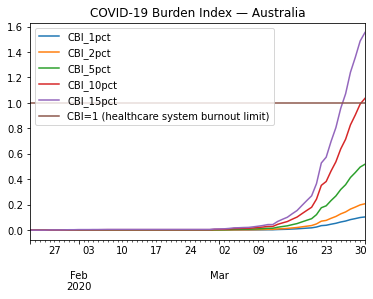

In [18]:
df_AU_CBI.plot(title='COVID-19 Burden Index — Australia',logy=False)